# Films Data Set Analysis and Visualization

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from collections import Counter

cf.go_offline()

from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline

## Taking a look at our Data Set

In [2]:
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df_countries = pd.read_csv("FilmsByCountry.csv")

In [3]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

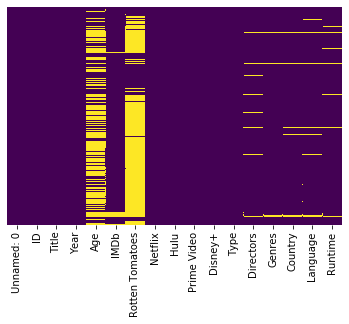

In [5]:
# Let´s see what data we are missing

sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap="viridis")

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [7]:
netflix_movies = len(df[df["Netflix"]==1].index)
hulu_movies = len(df[df["Hulu"]==1].index)
prime_movies = len(df[df["Prime Video"]==1].index)
disney_movies = len(df[df["Disney+"]==1].index)

print("Number of movies on each platform:")
print("\n")
print(f"Netflix:\t {netflix_movies}")
print(f"Hulu:\t\t {hulu_movies}")
print(f"Prime Video:\t {prime_movies}")
print(f"Disney+:\t {disney_movies}")

Number of movies on each platform:


Netflix:	 3560
Hulu:		 903
Prime Video:	 12354
Disney+:	 564


## Platforms

In [8]:
values = [netflix_movies,hulu_movies,prime_movies,disney_movies]
labels = ["Netflix","Hulu","Prime Video","Disney+"]
explode = (0.1, 0, 0, 0)

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.show()

## Locations

In [9]:
df_countries.head()

Unnamed: 0      Country  Number of Films CODE
0           0  Afghanistan                4  AFG
1           1      Albania                5  ALB
2           2      Algeria                4  DZA
3           3       Angola                1  AGO
4           4    Argentina              106  ARG

In [40]:
data = df_countries

n = 30

fig = px.bar(df_countries.sort_values(by="Number of Films",ascending=False).reset_index().iloc[:n],
             x='Country', y='Number of Films',
             color='Number of Films',
             title=f"Top {n} countries with most filmed films",
             height=400)
fig.show()

In [11]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [12]:
fig = px.choropleth(df_countries, locations="CODE",
                    color="Number of Films",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Number of films filmed per country",
                    height=500,
                    width=800)
fig.show() 

In [13]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

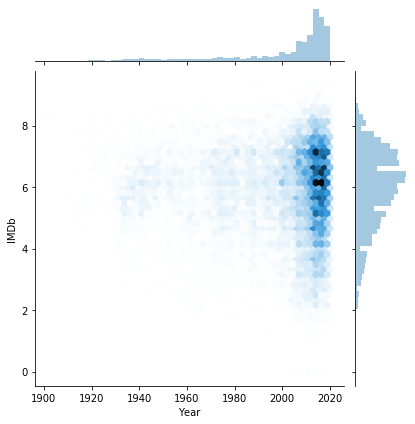

In [14]:
x = df["Year"]
y = df["IMDb"]

sns.jointplot(x,y,data=df,kind="hex")

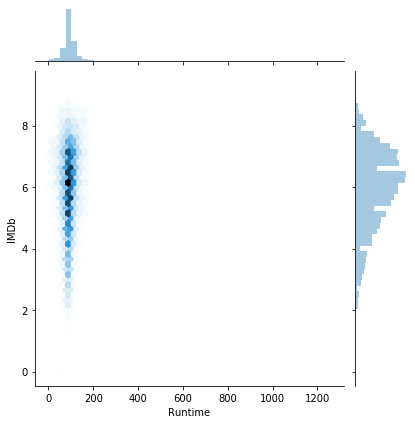

In [15]:
x = df["Runtime"]
y = df["IMDb"]

sns.jointplot(x,y,data=df,kind="hex")

In [16]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

In [17]:
fig = px.scatter(df,x="Runtime", y="IMDb",color="Year",
                 marginal_x="histogram",
                 marginal_y="histogram",
                 hover_name="Title",hover_data=["Age"])
fig.show()

## Age appropiate

In [18]:
height = 800

fig = px.scatter(df.dropna(),x="Runtime", y="IMDb",color="Age",
                marginal_x="histogram",
                hover_name="Title",hover_data=["Year"],
                height=height)
fig.show()

fig2 = px.scatter(df.dropna(),x="Year", y="IMDb",color="Age",
                marginal_x="histogram",
                hover_name="Title",hover_data=["Runtime"],
                height=height)
fig2.show()

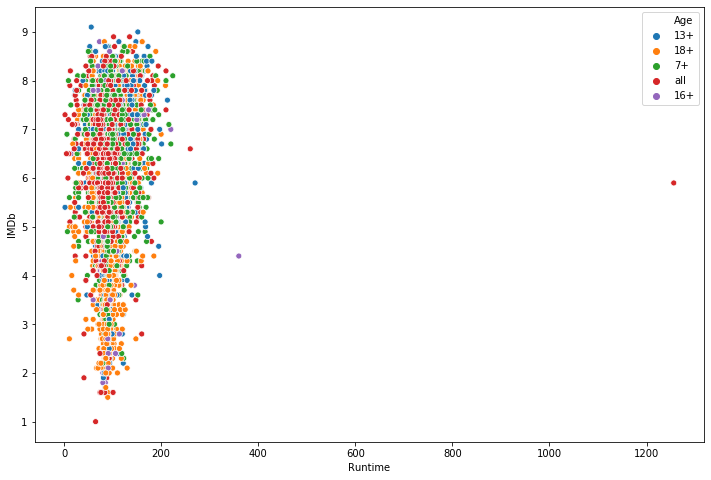

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Runtime", y="IMDb",hue="Age",data=df)

## Runtime

In [20]:
data = df

n = 30

fig = px.bar(df.sort_values(by="Runtime",ascending=False).reset_index().iloc[:n],
             x = "Title", y='Runtime',
             color='Runtime',
             hover_data=["Directors","IMDb"],
             title=f"Top {n} longest movies")
fig.show()

In [21]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

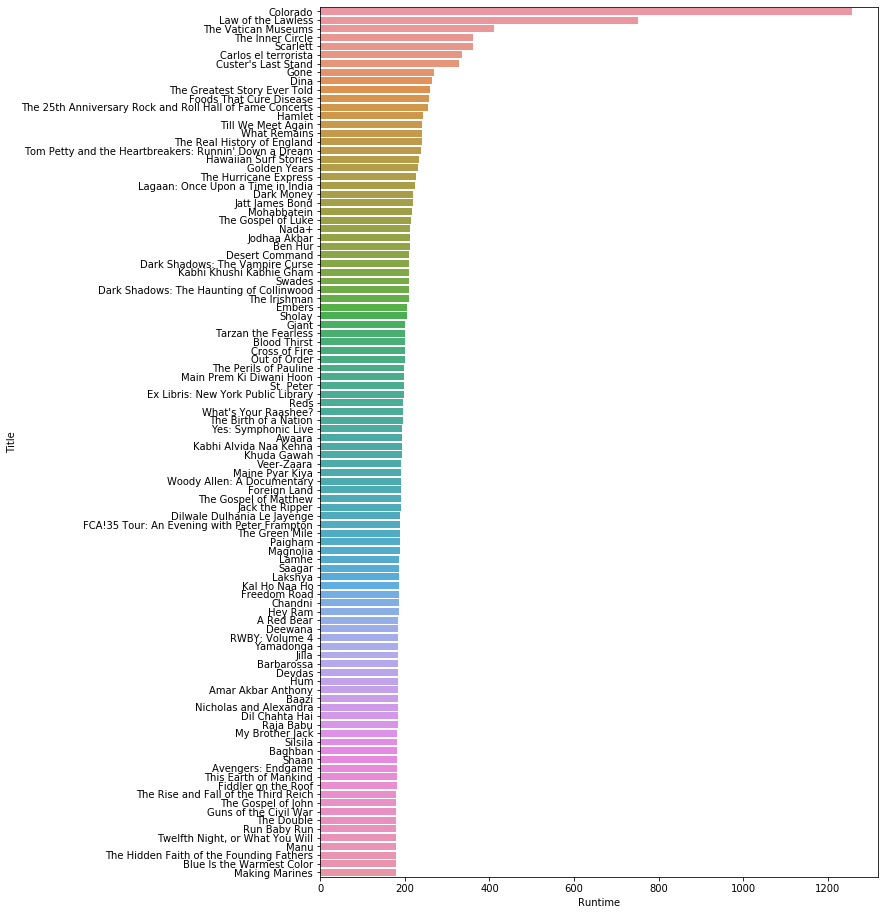

In [22]:
plt.figure(figsize=(10,16))
sns.barplot(x="Runtime",y="Title",data=df.sort_values(by="Runtime",ascending=False).reset_index().iloc[:100])

## Directors

In [23]:
# Create a new dataframe specific for directors and the number of movies they directed

directors = pd.DataFrame(df.groupby(["Directors"]).count()["ID"])
directors["No. of Films"] = directors["ID"]
directors.drop(["ID"],axis=1,inplace=True)
directors

No. of Films
Directors                                      
A'Ali de Sousa                                1
A. Bhimsingh                                  1
A. Edward Sutherland                          3
A. Edward Sutherland,John Rawlins             1
A. Fishman                                    1
...                                         ...
Élie Chouraqui                                1
Émile Gaudreault                              1
Óskar Thór Axelsson                           1
Ömer Faruk Sorak                              2
Özcan Alper                                   1

[11338 rows x 1 columns]

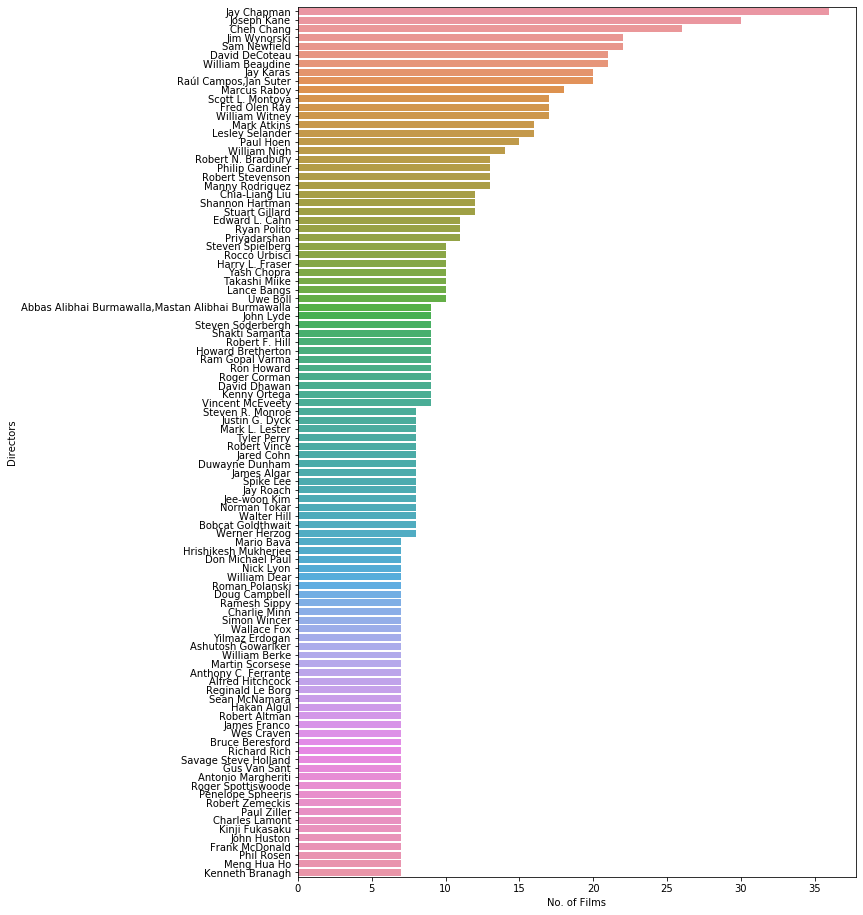

In [24]:
data = directors.sort_values(by="No. of Films",ascending=False).reset_index().iloc[:100]

plt.figure(figsize=(10,16))
sns.barplot(x="No. of Films",y="Directors",data=data)

In [25]:
n = 40
data = directors.sort_values(by="No. of Films",ascending=False).reset_index().iloc[:n]

fig = px.bar(data,
             x = "Directors", y='No. of Films',
             color='No. of Films',
             title=f"Top {n} directors with most directed movies")
fig.show()

In [26]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

In [27]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [28]:
for i in df.drop(["Unnamed: 0","ID"],axis=1).columns:
    print(i,":",df[i].nunique())

Title : 16744
Year : 109
Age : 5
IMDb : 82
Rotten Tomatoes : 99
Netflix : 2
Hulu : 2
Prime Video : 2
Disney+ : 2
Type : 1
Directors : 11338
Genres : 1909
Country : 1303
Language : 1102
Runtime : 225


In [29]:
# Directors who directed the best and worst IMDb ranked movies

n = 30
x="Directors"

data1 = df.groupby(by="Directors").mean().sort_values(by="IMDb",ascending=False).reset_index().iloc[:n]
data2 = df.groupby(by="Directors").mean().sort_values(by="IMDb",ascending=True).reset_index().iloc[2:n]

# For the worst IMDb average we droped the worst two because they had an average of 0 and it´s not considered representative

fig = px.bar(data1,x=data1["Directors"],y=data1["IMDb"],color="IMDb",
             title=f"Top {n} Directors with the highest averaged movie ratings")
fig.show()

fig = px.bar(data2,x=data2["Directors"],y=data2["IMDb"],color="IMDb",
            title=f"Top {n} Directors with the lowest averaged movie ratings")
fig.show()

In [30]:
# Directors who directed the lowest and shortest movies

n = 30
x="Directors"

data1 = df.groupby(by="Directors").mean().sort_values(by="Runtime",ascending=False).reset_index().iloc[:n]
data2 = df.groupby(by="Directors").mean().sort_values(by="Runtime",ascending=True).reset_index().iloc[:n]

# For the worst IMDb average we droped the worst two because they had an average of 0 and it´s not considered representative

fig = px.bar(data1,x=data1["Directors"],y=data1["Runtime"],color="Runtime",
             title=f"Top {n} Directors with longest average runtime for directed movies")
fig.show()

fig = px.bar(data2,x=data2["Directors"],y=data2["Runtime"],color="Runtime",
            title=f"Top {n} Directors with shortest average runtime for directed movies")
fig.show()

## Genres

In [31]:
# How many different genres do we have?


print(f" We have {df['Genres'].nunique()} different genres")
print("\n")
print(df["Genres"].value_counts())

 We have 1909 different genres


Drama                                              1341
Documentary                                        1229
Comedy                                             1040
Comedy,Drama                                        446
Horror                                              436
                                                   ... 
Animation,Action,Adventure,Comedy,Drama,Fantasy       1
Action,Adventure,Drama,Fantasy,Mystery,Sci-Fi         1
Adventure,Fantasy,Mystery,Thriller                    1
Animation,History                                     1
Action,Adventure,Sci-Fi,Comedy                        1
Name: Genres, Length: 1909, dtype: int64


In [32]:
# Some films cover various genres
# We can extract these genres by separating the words where the is a ","

all_genres = []

for genre in df["Genres"].dropna():
    movie_genres = genre.split(",")
    for i in movie_genres:
        all_genres.append(i)

In [33]:
d = Counter(all_genres)
print("These are the basic genres:")
d

These are the basic genres:


Counter({'Action': 2683,
         'Adventure': 1778,
         'Sci-Fi': 1228,
         'Thriller': 3354,
         'Comedy': 4637,
         'Western': 499,
         'Animation': 711,
         'Family': 1514,
         'Biography': 821,
         'Drama': 7227,
         'Music': 667,
         'War': 539,
         'Crime': 1833,
         'Fantasy': 1089,
         'Romance': 2359,
         'History': 715,
         'Mystery': 1274,
         'Horror': 2201,
         'Sport': 404,
         'Documentary': 2546,
         'Musical': 401,
         'News': 105,
         'Short': 386,
         'Reality-TV': 22,
         'Talk-Show': 19,
         'Game-Show': 7,
         'Film-Noir': 79})

In [34]:
# Let´s turn this into a dataframe so that we can plot it

genres = pd.DataFrame.from_dict(d, orient='index').reset_index()
genres["Genre"] = genres["index"]
genres["Count"] = genres[0]
genres.drop(["index",0],axis=1,inplace=True)
genres.head()

Genre  Count
0     Action   2683
1  Adventure   1778
2     Sci-Fi   1228
3   Thriller   3354
4     Comedy   4637

In [35]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   27 non-null     object
 1   Count   27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


We can see that even though there are 1909 different genres including combined and individual, there are only 37 basic ones.

In [36]:
# Genres

n = 30

# 1. Genre distribution as described in dataset. Including mixed genres.

data1 = df.groupby(by="Genres").count().sort_values(by="ID",ascending=False).reset_index().iloc[:n]

fig = px.pie(data1,names=data1["Genres"],values=data1["ID"],
            title=f'General Genre Distribution. Top {n} most common movie genres')
fig.show()

# 2. Genre individual distribution.
# If we split up the movies with a mixed Genre (i.e: Comedy,Drama,Romance)
# we get 27 basic genres.

fig = px.pie(genres, values='Count', names='Genre', 
             title='Movie Genres Proportion')
fig.show()

Let´s explain this a bit more...

The original "Genres" column in the dataset holds 1909 different genres. The reason as to why there are so many is because there are various combinations of different genres, such as Comedy/Drama, Documentary/Music or Horror/Mistery/Thriller. The first plot shows which of these combinations or individual genres are the most common. We can see that genres such as Drama or Documentary are very popular, as well as Comedy/Drama or Drama/Romance.

However, if we want to analyse which of the basic genres are the most popular, we must split up the composed genres into basic ones. Then we will find out how many basic genres we have, and how many times they appear. We arrive to the conclusion that there are 27 basic genres, being Drama, Comedy and Thriller the most popular ones. Information about these genres and their proportion is shown in the second plot   

Finally, we could see what the most common mixed genres are...

In [37]:
"/" in "Ser/gio"

True

In [38]:
mixed_genres = []

for i in df["Genres"].dropna():
    if "," in i:
        mixed_genres.append(i)

d = Counter(mixed_genres)

print(f"We found a total of {len(d)} different genres")

# Create dataframe

df_mixedg = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_mixedg["Genre"] = df_mixedg["index"]
df_mixedg["Count"] = df_mixedg[0]
df_mixedg.drop(["index",0],axis=1,inplace=True)
df_mixedg.head()

We found a total of 1883 different genres


Genre  Count
0          Action,Adventure,Sci-Fi,Thriller     35
1                             Action,Sci-Fi     46
2                   Action,Adventure,Sci-Fi     48
3                   Adventure,Comedy,Sci-Fi      6
4  Animation,Action,Adventure,Family,Sci-Fi      5

In [39]:
n = 30

# 3. Most common mixed genres.

fig = px.pie(df_mixedg.sort_values(by="Count",ascending=False).reset_index().iloc[:n], values='Count', names='Genre', 
             title=f"Top {n} most common movie mixed genres")
fig.show()